In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy 
from cartopy.util import add_cyclic_point
import cartopy.mpl.ticker as cticker
import xesmf as xe

In [2]:
file = '/shared/scratch/jgaigala/asr15km.anl.2D.200001.mon.nc'

In [3]:
ds = xr.open_dataset(file)
ds = ds.rename({'XLONG': 'lon', 'XLAT': 'lat'})
var = 'SNOALB'

In [4]:
# Create new lons and lats on a regular grid
new_lat=np.arange(-90,90.1,0.1)
new_lon=np.arange(0,360.1,0.1)

# Create an xarray.Dataset that defines the new grid
ds_out = xr.Dataset({'lat': (['lat'], new_lat),
                    'lon': (['lon'], new_lon)})


In [5]:
# Regrid the data to the new grid 
regridder = xe.Regridder(ds, ds_out, 'bilinear', reuse_weights=True)
dr = regridder(ds[var]).to_dataset(name=var)

Create weight file: bilinear_720x720_1801x3601.nc


## Map regridded ASR 15km SNOALB

Text(0.5, 1.0, 'ARSv2 2000 January Snow Albedo Fraction')

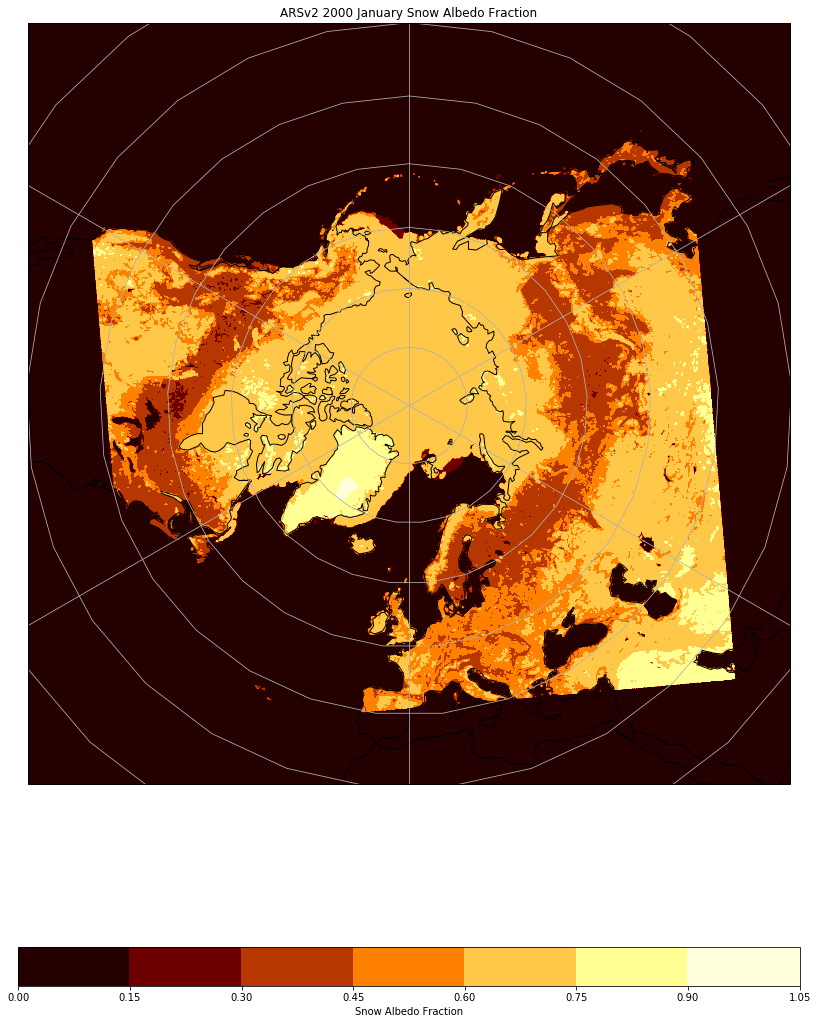

In [6]:
fig = plt.figure(figsize=(20,20))

# specify axis map projection
ax=plt.axes(projection=ccrs.NorthPolarStereo())


# make a filled contour plot
cs=ax.contourf(dr['lon'], dr['lat'], 
            dr['SNOALB'][0], 
            transform=ccrs.PlateCarree(),
            cmap='afmhot')

ax.set_extent([-180, 180, 30, 90], ccrs.PlateCarree())

# add reference lines
ax.coastlines()
ax.gridlines()

cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,label='Snow Albedo Fraction')

plt.title('ARSv2 2000 January Snow Albedo Fraction')